# Basics of the API

#### Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow):

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
• For supervised learning, often we predict labels for unknown data using the predict() method.
• For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [2]:
import pandas as pd
import numpy as np

#*****scaling data for standardisation*****#
from sklearn import preprocessing

#*****spliting data for train vs test*****#
from sklearn.model_selection import train_test_split,KFold, cross_val_score

#*****feature selection*****#
from sklearn.feature_selection import RFE

#******models*****#
from sklearn import cluster
from sklearn import linear_model
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV



#*****metrics for evaluating models*****#
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,roc_auc_score,average_precision_score,precision_recall_curve


#*****graphs*********#
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sn

In [3]:
pf = pd.read_csv('creditcard.csv')

In [4]:
pf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
pf['Class'].sum()

492

In [7]:
len(pf['Class'])

284807

In [8]:
natural_hit_rate=pf['Class'].sum()/len(pf['Class'])

In [9]:
natural_hit_rate

0.001727485630620034

In [10]:
X=pf.drop('Class',axis=1)

In [11]:
y=pf[['Class']]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
model=RandomForestClassifier(random_state=0,class_weight='balanced_subsample')

In [14]:
model.fit(X_train,y_train) 

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced_subsample', random_state=0)

In [15]:
y_test_pred = model.predict(X_test)

In [16]:
print(accuracy_score(y_test,y_test_pred))

0.9995318516437859


In [17]:
y_test_proba=model.predict_proba(X_test)

In [19]:
print(roc_auc_score(y_test, y_test_proba[:,1]))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

0.9509473293162698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.96      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85291     5]
 [   35   112]]


In [29]:
model.feature_importances_

array([0.00489498, 0.01092876, 0.02723312, 0.0434699 , 0.08713387,
       0.00772398, 0.01331817, 0.01709459, 0.01241474, 0.01339419,
       0.16952548, 0.06963688, 0.086218  , 0.00697284, 0.21332456,
       0.00654298, 0.05280752, 0.04629725, 0.01276271, 0.01491594,
       0.01153678, 0.01684917, 0.00605134, 0.00601926, 0.0037448 ,
       0.00599712, 0.00884577, 0.00885121, 0.00549735, 0.00999673])

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

5.8619395985743764e-05

In [22]:
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

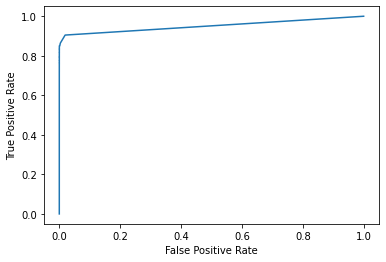

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])
plot_roc_curve(y_test, y_test_proba[:,1])

In [64]:
y_proba[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [80]:
test=[i for i in y_proba[:,1] if (i != 0) & (i!=1)]

In [67]:
len(y_proba[:,1])

85443

In [82]:
len(test)

2004

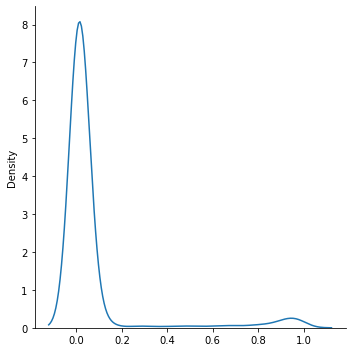

In [83]:
sn.displot(test,kind='kde')

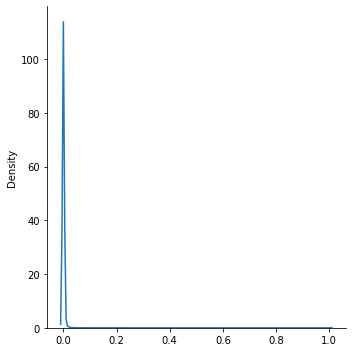

In [79]:
sn.displot(y_proba[:,1],kind='kde')

In [99]:
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8], 'criterion': ['gini', 'entropy']}

In [100]:
CV_model = GridSearchCV(estimator=model,param_grid=param_grid,scoring='recall')

In [101]:
CV_model.fit(X_train, y_train)
CV_model.best_params_

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was exp

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was exp

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 30}

In [107]:
y_pred=CV_model.predict(X_test)
y_proba=CV_model.predict_proba(X_test)

In [106]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.51      0.84      0.63       147

    accuracy                           1.00     85443
   macro avg       0.75      0.92      0.82     85443
weighted avg       1.00      1.00      1.00     85443

[[85175   121]
 [   23   124]]


In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

In [139]:
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

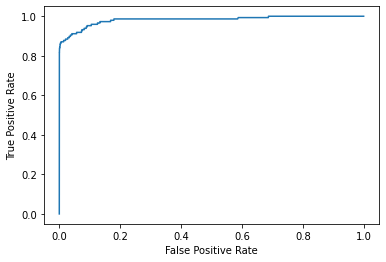

In [110]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
plot_roc_curve(y_test, y_proba[:,1])

In [111]:
print(roc_auc_score(y_test, y_proba[:,1]))

0.9819509284674289


In [120]:
scaler = preprocessing.MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [117]:
kmeans = cluster.MiniBatchKMeans(n_clusters=8,random_state=0)

In [121]:
kmeans.fit(X_scaled)

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(random_state=0)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [123]:
kmeans = cluster.MiniBatchKMeans(n_clusters=8,random_state=0).fit(X_train)

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [124]:
X_test_clusters=kmeans.predict(X_test)

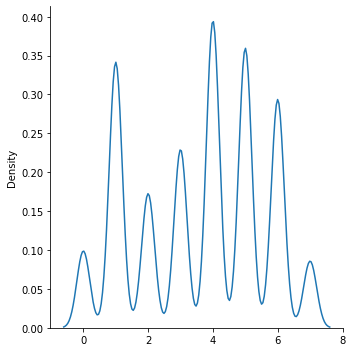

In [152]:
sn.displot(X_test_clusters,kind='kde')

In [128]:
#Cluster centroids
X_test_clusters_centres=kmeans.cluster_centers_

In [143]:
#distance of each ponit to the centroids
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centres[X_test_clusters])]

In [144]:
km_y_pred = np.array(dist)

In [156]:
km_y_pred

array([0.16146256, 0.09570682, 0.2970168 , ..., 0.17049328, 0.15695734,
       0.30658064])

In [146]:
len(km_y_pred)

85443

In [ ]:
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

In [142]:
km_y_pred.sum()

4273.0

In [138]:
print(roc_auc_score(y_test, km_y_pred))

0.8974475200885083


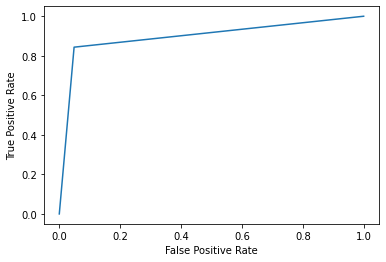

In [140]:
fpr, tpr, thresholds = roc_curve(y_test, km_y_pred)
plot_roc_curve(y_test, km_y_pred)